## <u>Logistic Regression Model to Predict Income Levels Using Demographic and Socioeconomic Factors</u>

## Project Overview

This project aims to predict whether an individual earns more or less than $50,000 annually based on various demographic and socioeconomic characteristics. Logistic regression, a method for binary classification, is used to analyze the dataset that includes variables such as age, education, occupation, and marital status. By developing and evaluating this predictive model, the project seeks to identify key determinants of income, offering valuable insights into the socioeconomic factors associated with higher or lower earnings.


Dataset: https://archive.ics.uci.edu/dataset/2/adult

### Project Owner: Manuel Contreras

In [599]:
display(Math(r'P_i = P(x_i) = \frac{1}{1+e^{-\sum_{j=0}^k\beta_j\cdot x_{ij}}} '))

<IPython.core.display.Math object>

### 1 - Libraries

##### Basic Libraries

In [597]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from IPython.display import display, Math

##### Sklearn Libraries

In [686]:
import statsmodels.api as sm
from sklearn import datasets
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from sklearn.decomposition import PCA
from sklearn.model_selection import cross_val_score
from plotnine import ggplot, aes, geom_line, geom_abline,geom_area,ggtitle

### 2 - Dataset Import and Feature Computation

In [600]:
file_path = r"C:\Users\manue\Desktop\DataScience\Datasets\adult.data.csv"

df = pd.read_csv(file_path, sep=',', header=None, names=[ "AGE","workclass",
    "fnlwgt",
    "education",
    "education-num",
    "marital-status",
    "occupation",
    "relationship",
    "race",
    "sex",
    "capital-gain",
    "capital-loss",
    "hours-per-week",
    "native-country",
    "salary"
])

In [601]:
df.head()

,AGE,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [602]:
rows, columns = df.shape
print(f"The dataset has {columns} columns and {rows} rows.")

The dataset has 15 columns and 32561 rows.


In [603]:
column_names = df.columns.values
column_names

array(['AGE', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'salary'], dtype=object)

### 3 - Data Cleaning

#### Null Values Processing

In [604]:
# missing values in the dataset
missing_values = df.isnull().sum()
print(missing_values)

AGE               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
salary            0
dtype: int64


#### Elimination of Duplicates

In [605]:
duplicates = df[df.duplicated()]
duplicates

,AGE,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
4881,25,Private,308144,Bachelors,13,Never-married,Craft-repair,Not-in-family,White,Male,0,0,40,Mexico,<=50K
5104,90,Private,52386,Some-college,10,Never-married,Other-service,Not-in-family,Asian-Pac-Islander,Male,0,0,35,United-States,<=50K
9171,21,Private,250051,Some-college,10,Never-married,Prof-specialty,Own-child,White,Female,0,0,10,United-States,<=50K
11631,20,Private,107658,Some-college,10,Never-married,Tech-support,Not-in-family,White,Female,0,0,10,United-States,<=50K
13084,25,Private,195994,1st-4th,2,Never-married,Priv-house-serv,Not-in-family,White,Female,0,0,40,Guatemala,<=50K
15059,21,Private,243368,Preschool,1,Never-married,Farming-fishing,Not-in-family,White,Male,0,0,50,Mexico,<=50K
17040,46,Private,173243,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,40,United-States,<=50K
18555,30,Private,144593,HS-grad,9,Never-married,Other-service,Not-in-family,Black,Male,0,0,40,?,<=50K
18698,19,Private,97261,HS-grad,9,Never-married,Farming-fishing,Not-in-family,White,Male,0,0,40,United-States,<=50K
21318,19,Private,138153,Some-college,10,Never-married,Adm-clerical,Own-child,White,Female,0,0,10,United-States,<=50K


In [606]:
rows, columns = duplicates.shape
print(f"There are {rows} duplicates")

There are 24 duplicates


In [607]:
# Since the duplicates do not even represent 1% of the entries, they are to be deleted
df = df.drop_duplicates(keep='last')

In [608]:
df.shape

(32537, 15)

### 4 - Exploratory Data Analysis

#### Number of People with Salary >50K vs <=50K

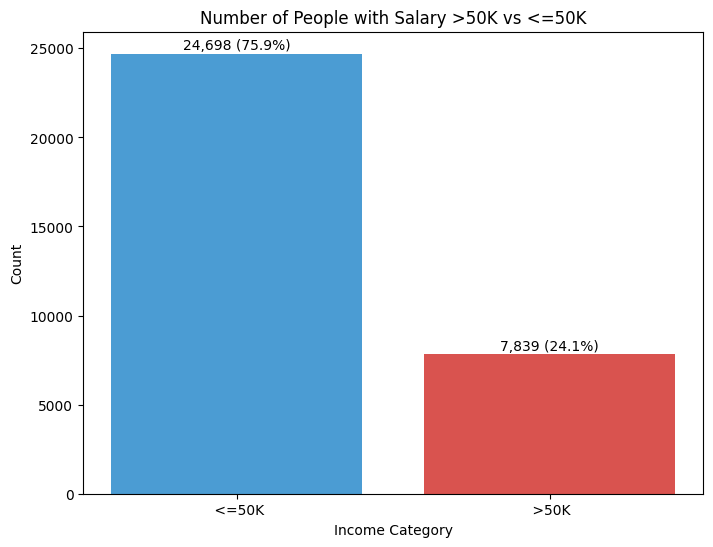

In [609]:
# number of occurrences for each income category
income_counts = df['salary'].value_counts()

# percentages
total_count = income_counts.sum()
percentages = (income_counts / total_count) * 100

# bar chart
plt.figure(figsize=(8, 6))
bars = plt.bar(income_counts.index, income_counts.values, color=['#4b9cd3', '#d9534f'])

# percentage labels on top of each bar
for bar in bars:
    height = bar.get_height()
    income_category = bar.get_x() + bar.get_width() / 2
    category_name = income_counts.index[int(income_category)]
    percentage = percentages[category_name]
    plt.text(bar.get_x() + bar.get_width() / 2, height + 50, f'{height:,} ({percentage:.1f}%)',
             ha='center', va='bottom')

# labels and title
plt.xlabel('Income Category')
plt.ylabel('Count')
plt.title('Number of People with Salary >50K vs <=50K')

# plot
plt.show()

#### Percentage of Salary Distribution by Sex-Race Group

<Figure size 2000x1600 with 0 Axes>

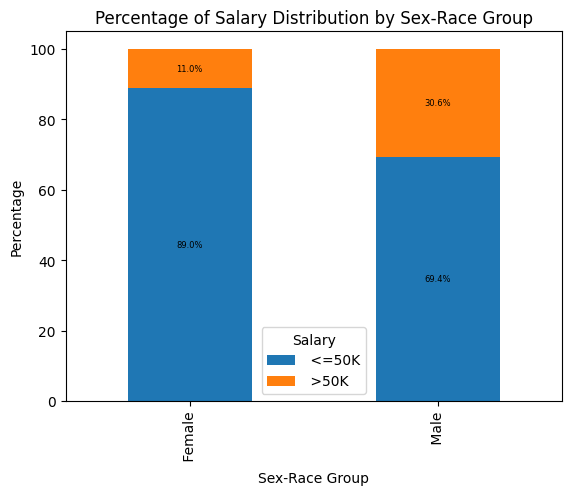

In [610]:
# percentage distribution
percentage_df = df.groupby(['sex', 'salary']).size().unstack(fill_value=0)
percentage_df = percentage_df.apply(lambda x: x / x.sum() * 100, axis=1)

# Plotting
plt.figure(figsize=(20, 16))  
ax = percentage_df.plot(kind='bar', stacked=True, color=['#1f77b4', '#ff7f0e'])

# percentages on the bars
for container in ax.containers:
    ax.bar_label(container, fmt='%.1f%%', label_type='center', fontsize=6, color='black')

plt.title('Percentage of Salary Distribution by Sex-Race Group')
plt.xlabel('Sex-Race Group')
plt.ylabel('Percentage')
plt.legend(title='Salary')
plt.show()

#### Percentage of Salary Distribution by Sex-Race Group

In [611]:
# Combination of 'sex' and 'race'
df['sex-race'] = df['sex'] + '-' + df['race']

<Figure size 2000x1600 with 0 Axes>

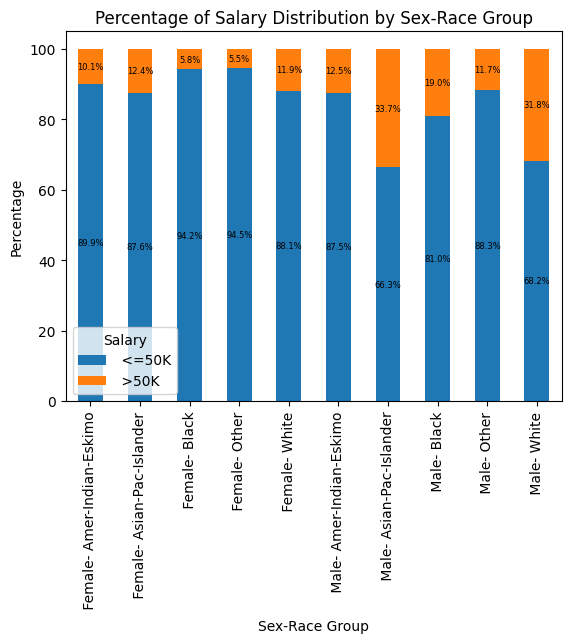

In [612]:
# percentage distribution
percentage_df = df.groupby(['sex-race', 'salary']).size().unstack(fill_value=0)
percentage_df = percentage_df.apply(lambda x: x / x.sum() * 100, axis=1)

# Plotting
plt.figure(figsize=(20, 16))  
ax = percentage_df.plot(kind='bar', stacked=True, color=['#1f77b4', '#ff7f0e'])

# percentages on the bars
for container in ax.containers:
    ax.bar_label(container, fmt='%.1f%%', label_type='center', fontsize=6, color='black')

plt.title('Percentage of Salary Distribution by Sex-Race Group')
plt.xlabel('Sex-Race Group')
plt.ylabel('Percentage')
plt.legend(title='Salary')
plt.show()

Males of asian/pacific islander and of white origin earn the most, while afroamerican females the less.

#### Age Distribution by Income

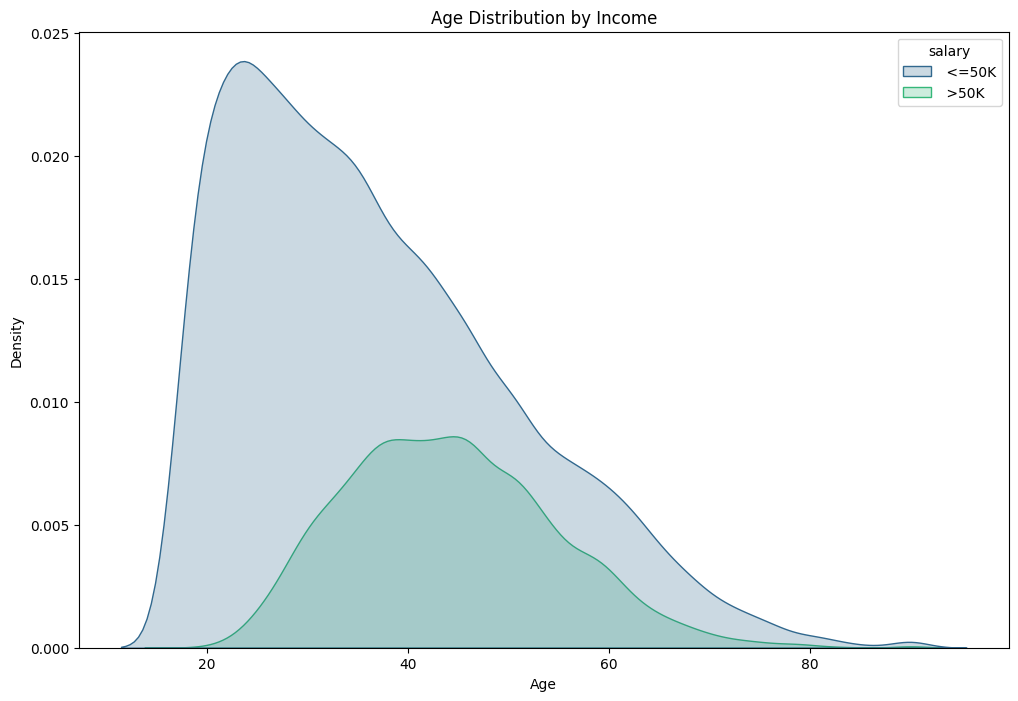

In [613]:
plt.figure(figsize=(12, 8))
sns.kdeplot(data=df, x='AGE', hue='salary', fill=True, palette='viridis')
plt.title('Age Distribution by Income')
plt.xlabel('Age')
plt.ylabel('Density')
plt.show()

As expected, people in their 20s tend to make less money, and from 45 on aproximately there are more people than make over 50K than those who make less.

#### Income Distribution by Workclass

<Figure size 1400x1000 with 0 Axes>

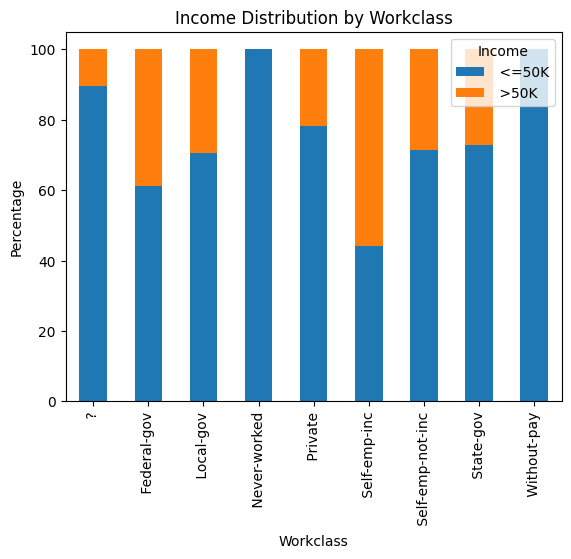

In [614]:
plt.figure(figsize=(14, 10))
workclass_income = df.groupby(['workclass', 'salary']).size().unstack()
workclass_income = workclass_income.apply(lambda x: x / x.sum() * 100, axis=1)
workclass_income.plot(kind='bar', stacked=True, color=['#1f77b4', '#ff7f0e'])

plt.title('Income Distribution by Workclass')
plt.xlabel('Workclass')
plt.ylabel('Percentage')
plt.legend(title='Income')
plt.show()

In [615]:
workclass_counts = df['workclass'].value_counts()
workclass_counts

workclass
Private             22673
Self-emp-not-inc     2540
Local-gov            2093
?                    1836
State-gov            1298
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: count, dtype: int64

#### Salary Distribution by Education Level

<Figure size 1400x800 with 0 Axes>

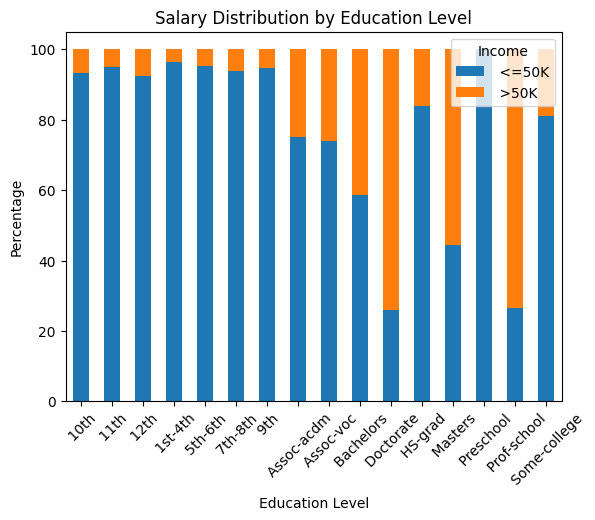

In [616]:
plt.figure(figsize=(14, 8))
education_salary = df.groupby(['education', 'salary']).size().unstack().fillna(0)
education_salary_percentage = education_salary.apply(lambda x: x / x.sum() * 100, axis=1)
education_salary_percentage.plot(kind='bar', stacked=True, color=['#1f77b4', '#ff7f0e'])

plt.title('Salary Distribution by Education Level')
plt.xlabel('Education Level')
plt.ylabel('Percentage')
plt.xticks(rotation=45)
plt.legend(title='Income')
plt.show()

There are many categories that are not needed and could be made into one, so it is time for some data cleaning again.

In [617]:
unique_education_levels = df['education'].unique()
unique_education_levels

array([' Bachelors', ' HS-grad', ' 11th', ' Masters', ' 9th',
       ' Some-college', ' Assoc-acdm', ' Assoc-voc', ' 7th-8th',
       ' Doctorate', ' Prof-school', ' 5th-6th', ' 10th', ' 1st-4th',
       ' Preschool', ' 12th'], dtype=object)

In [618]:
# Strip any leading or trailing whitespace from the 'education' column
df['education'] = df['education'].str.strip()

In [619]:
# Map existing education levels to new categories
df["education"] = np.where(df["education"].isin(["11th", "9th","10th", "7th-8th", "5th-6th", "1st-4th", "12th"]), "High School Dropped-Out", df["education"])
df["education"] = np.where(df["education"] == "Bachelors", "Bachelor", df["education"])
df["education"] = np.where(df["education"] == "Masters", "Master", df["education"])
df["education"] = np.where(df["education"] == "Some-college", "Community College", df["education"])
df["education"] = np.where(df["education"].isin(["Assoc-acdm", "Assoc-voc"]), "Associate Degree", df["education"])
df["education"] = np.where(df["education"] == "HS-grad", "High School", df["education"])

<Figure size 1400x800 with 0 Axes>

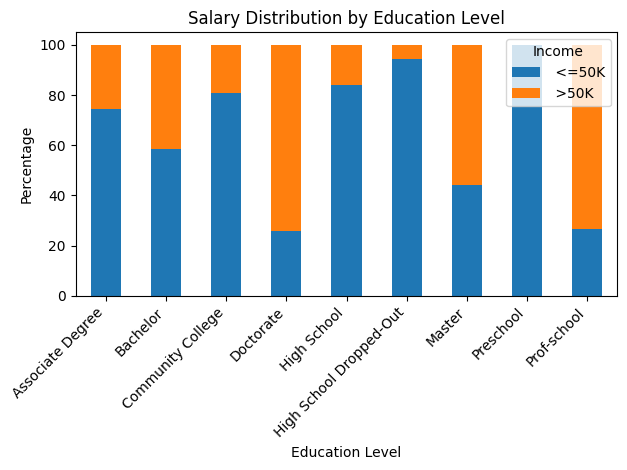

In [620]:
# Group by 'education' and 'salary' and calculate size
education_salary = df.groupby(['education', 'salary']).size().unstack(fill_value=0)

# Convert counts to percentages
education_salary_percentage = education_salary.apply(lambda x: x / x.sum() * 100, axis=1)
import matplotlib.pyplot as plt

# bar plot showing the proportion of each salary category for each education level
plt.figure(figsize=(14, 8))
education_salary_percentage.plot(kind='bar', stacked=True, color=['#1f77b4', '#ff7f0e'])

plt.title('Salary Distribution by Education Level')
plt.xlabel('Education Level')
plt.ylabel('Percentage')
plt.xticks(rotation=45, ha='right')  
plt.legend(title='Income')
plt.tight_layout()  
plt.show()

<Figure size 1400x800 with 0 Axes>

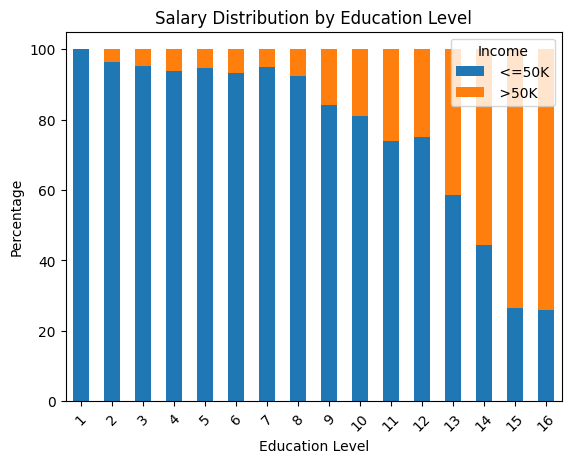

In [621]:
plt.figure(figsize=(14, 8))
education_salary = df.groupby(['education-num', 'salary']).size().unstack().fillna(0)
education_salary_percentage = education_salary.apply(lambda x: x / x.sum() * 100, axis=1)
education_salary_percentage.plot(kind='bar', stacked=True, color=['#1f77b4', '#ff7f0e'])

plt.title('Salary Distribution by Education Level')
plt.xlabel('Education Level')
plt.ylabel('Percentage')
plt.xticks(rotation=45)
plt.legend(title='Income')
plt.show()

As expected, the higher level of education, the higher the salary

#### Distribution of Education Levels

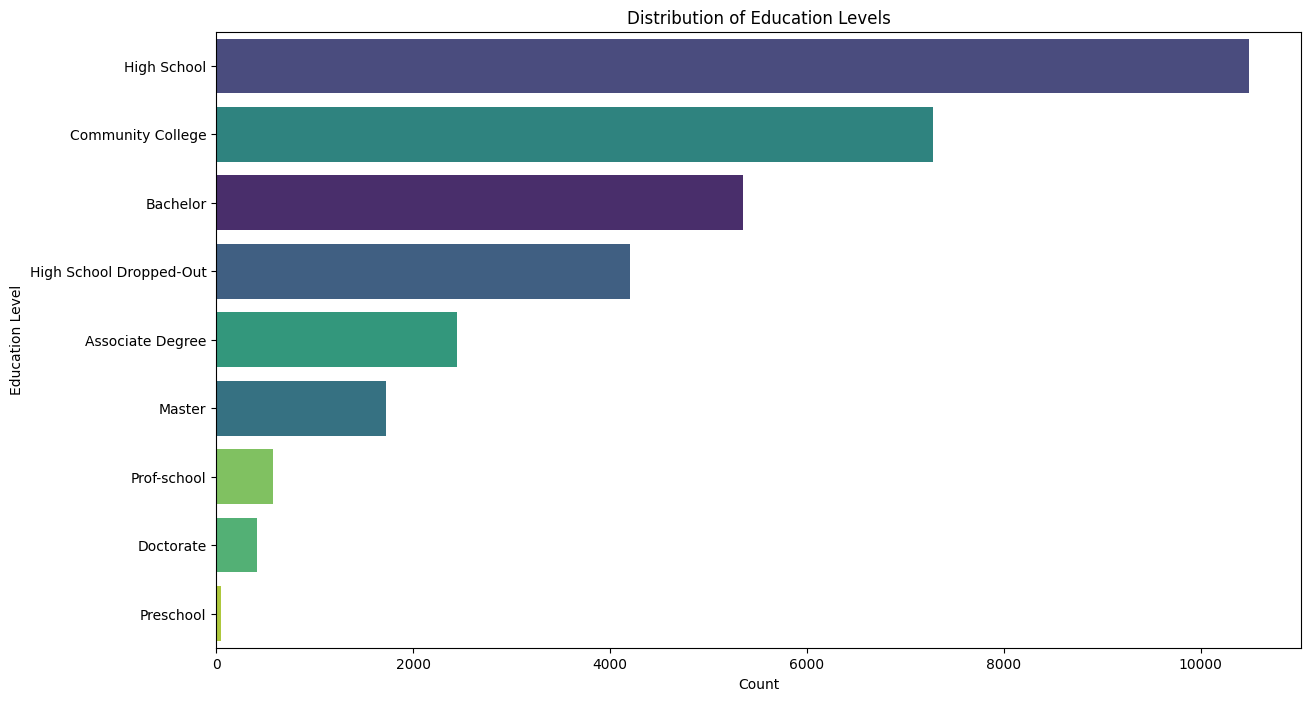

In [623]:
plt.figure(figsize=(14, 8))
sns.countplot(data=df, y='education', order=df['education'].value_counts().index, palette='viridis', hue='education')


plt.title('Distribution of Education Levels')
plt.xlabel('Count')
plt.ylabel('Education Level')
plt.legend([],[], frameon=False)
plt.show()

#### Occupation Heatmap

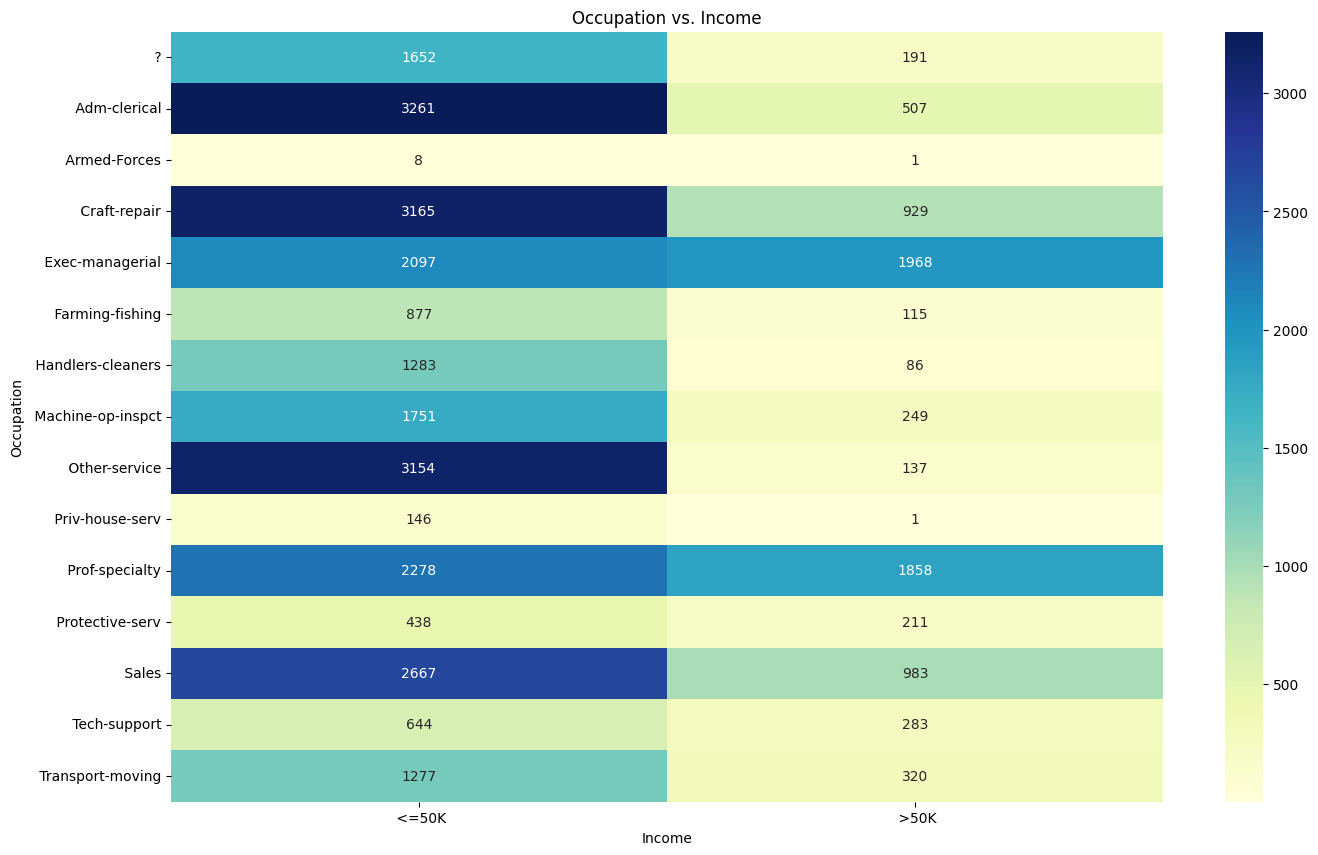

In [624]:
plt.figure(figsize=(16, 10))
occupation_income = df.groupby(['occupation', 'salary']).size().unstack()
sns.heatmap(occupation_income, annot=True, cmap='YlGnBu', fmt='d')

plt.title('Occupation vs. Income')
plt.xlabel('Income')
plt.ylabel('Occupation')
plt.show()

The only two occupations where more than 40% make more than 50K are executives/managers and professors.

# 5 - Data Preparation for the implementation of the Logistic Regression Models

Logistic regression is a statistical method used for binary classification, aiming to predict the probability of a binary outcome based on predictor variables. Unlike linear regression, which predicts continuous values, logistic regression uses the logistic (sigmoid) function to map predicted values to a probability between 0 and 1.

In [625]:
# It will be necessary to convert all of the categorical variables to dummy variables. To avoid having one column per country, it was decided to convert this 
# variable to a binary one, that classifies whether the person is local or not

unique_countries = df['native-country'].unique()
unique_countries

array([' United-States', ' Cuba', ' Jamaica', ' India', ' ?', ' Mexico',
       ' South', ' Puerto-Rico', ' Honduras', ' England', ' Canada',
       ' Germany', ' Iran', ' Philippines', ' Italy', ' Poland',
       ' Columbia', ' Cambodia', ' Thailand', ' Ecuador', ' Laos',
       ' Taiwan', ' Haiti', ' Portugal', ' Dominican-Republic',
       ' El-Salvador', ' France', ' Guatemala', ' China', ' Japan',
       ' Yugoslavia', ' Peru', ' Outlying-US(Guam-USVI-etc)', ' Scotland',
       ' Trinadad&Tobago', ' Greece', ' Nicaragua', ' Vietnam', ' Hong',
       ' Ireland', ' Hungary', ' Holand-Netherlands'], dtype=object)

In [626]:
# Transform the 'native-country' column
df['native-country'] = np.where(df['native-country'] == ' United-States', 'yes', 'no')

In [627]:
x = df.drop(columns=['salary', 'fnlwgt', 'sex-race'])
y = df['salary']

In [628]:
x.head()

,AGE,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
0,39,State-gov,Bachelor,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,yes
1,50,Self-emp-not-inc,Bachelor,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,yes
2,38,Private,High School,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,yes
3,53,Private,High School Dropped-Out,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,yes
4,28,Private,Bachelor,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,no


In [629]:
categorical_variables = ['workclass', 'education', 'marital-status','occupation', 'relationship','race','sex','native-country']

In [630]:
for cat_var in categorical_variables:
    if cat_var in x.columns:
        # Convert categorical variable to dummy variables
        dummies = pd.get_dummies(x[cat_var], prefix=cat_var)
        
        # Ensure that dummy variables have 0 and 1 (they already do by default)
        # Convert boolean values to integers if necessary
        dummies = dummies.astype(int)
        
        # Append dummy variables to the DataFrame
        x = pd.concat([x, dummies], axis=1)
        
        # Drop the original categorical variable
        x = x.drop(cat_var, axis=1)
    else:
        print(f"Warning: Column '{cat_var}' not found in DataFrame.")

print(x)

       AGE  education-num  capital-gain  capital-loss  hours-per-week  \
0       39             13          2174             0              40   
1       50             13             0             0              13   
2       38              9             0             0              40   
3       53              7             0             0              40   
4       28             13             0             0              40   
...    ...            ...           ...           ...             ...   
32556   27             12             0             0              38   
32557   40              9             0             0              40   
32558   58              9             0             0              40   
32559   22              9             0             0              20   
32560   52              9         15024             0              40   

       workclass_ ?  workclass_ Federal-gov  workclass_ Local-gov  \
0                 0                       0           

In [631]:
x.head()

,AGE,education-num,capital-gain,capital-loss,hours-per-week,workclass_ ?,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Never-worked,workclass_ Private,...,relationship_ Wife,race_ Amer-Indian-Eskimo,race_ Asian-Pac-Islander,race_ Black,race_ Other,race_ White,sex_ Female,sex_ Male,native-country_no,native-country_yes
0,39,13,2174,0,40,0,0,0,0,0,...,0,0,0,0,0,1,0,1,0,1
1,50,13,0,0,13,0,0,0,0,0,...,0,0,0,0,0,1,0,1,0,1
2,38,9,0,0,40,0,0,0,0,1,...,0,0,0,0,0,1,0,1,0,1
3,53,7,0,0,40,0,0,0,0,1,...,0,0,0,1,0,0,0,1,0,1
4,28,13,0,0,40,0,0,0,0,1,...,1,0,0,1,0,0,1,0,1,0


In [632]:
rows, columns = x.shape
print(f"X has {columns} columns and {rows} rows.")

X has 60 columns and 32537 rows.


In [633]:
scaler = preprocessing.StandardScaler().fit(x)
xscal = scaler.transform(x)
xscal

array([[ 0.03038995,  1.13477712,  0.14829174, ...,  0.70301957,
        -0.34070111,  0.34070111],
       [ 0.8369732 ,  1.13477712, -0.14597544, ...,  0.70301957,
        -0.34070111,  0.34070111],
       [-0.0429358 , -0.42067868, -0.14597544, ...,  0.70301957,
        -0.34070111,  0.34070111],
       ...,
       [ 1.42357919, -0.42067868, -0.14597544, ..., -1.42243552,
        -0.34070111,  0.34070111],
       [-1.2161478 , -0.42067868, -0.14597544, ...,  0.70301957,
        -0.34070111,  0.34070111],
       [ 0.9836247 , -0.42067868,  1.88763548, ..., -1.42243552,
        -0.34070111,  0.34070111]])

Logistic Regression models are designed for binary classification tasks, where the outcome variable is predicted as one of two possible values. Consequently, it is necessary to encode the target variable (Y) as binary values, typically 0 and 1, to align with the model's requirements.

In [634]:
print(y.unique())

[' <=50K' ' >50K']


In [635]:
mapping_dict = {' <=50K': 0, ' >50K': 1}

In [636]:
y = y.map(mapping_dict)

In [637]:
print(y)

0        0
1        0
2        0
3        0
4        0
        ..
32556    0
32557    1
32558    0
32559    0
32560    1
Name: salary, Length: 32537, dtype: int64


In [638]:
# Convert to Pandas Series
y_series = pd.Series(y)

# Count occurrences of each value
counts = y_series.value_counts()

print(counts)

salary
0    24698
1     7839
Name: count, dtype: int64


In [639]:
no_model_acc = 1-y_series.mean()
no_model_acc

0.7590742846605403

If no model is created, and if I always predict 0, which would be that the person earns less than 50K, would have given me an accuracy of 75,9%

# 6 - Implementation of different Logistic Regression Models

## 6.0 - Logistic Regression with Top 20 Variables

In [640]:
n = 20

In [641]:
lr = LogisticRegression()

In [642]:
rfe = RFE(estimator=lr, n_features_to_select=n)
rfe = rfe.fit(xscal,y)

In [643]:
print(rfe.support_)

[ True  True  True  True  True False False False False False False False
 False False False False False False False False False  True False  True
 False False  True  True  True  True  True False False False  True  True
 False False  True  True False False False False False False False False
  True False  True False False False False False  True  True False False]


In [644]:
print(rfe.ranking_)

[ 1  1  1  1  1 26  8 39 20  9 10 23 33  5 41 15 38 16 12 11 14  1 13  1
 28 25  1  1  1  1  1 40 35 31  1  1  4  7  1  1  6 19 22 17 34 27  2 21
  1  3  1 24 37 30 29 36  1  1 32 18]


In [645]:
z=zip(x.columns,rfe.support_, rfe.ranking_)

In [646]:
list(z)

[('AGE', True, 1),
 ('education-num', True, 1),
 ('capital-gain', True, 1),
 ('capital-loss', True, 1),
 ('hours-per-week', True, 1),
 ('workclass_ ?', False, 26),
 ('workclass_ Federal-gov', False, 8),
 ('workclass_ Local-gov', False, 39),
 ('workclass_ Never-worked', False, 20),
 ('workclass_ Private', False, 9),
 ('workclass_ Self-emp-inc', False, 10),
 ('workclass_ Self-emp-not-inc', False, 23),
 ('workclass_ State-gov', False, 33),
 ('workclass_ Without-pay', False, 5),
 ('education_Associate Degree', False, 41),
 ('education_Bachelor', False, 15),
 ('education_Community College', False, 38),
 ('education_Doctorate', False, 16),
 ('education_High School', False, 12),
 ('education_High School Dropped-Out', False, 11),
 ('education_Master', False, 14),
 ('education_Preschool', True, 1),
 ('education_Prof-school', False, 13),
 ('marital-status_ Divorced', True, 1),
 ('marital-status_ Married-AF-spouse', False, 28),
 ('marital-status_ Married-civ-spouse', False, 25),
 ('marital-status

In [647]:
columns= [
    'AGE',
    'education-num',
    'capital-gain',
    'capital-loss',
    'hours-per-week',
    'education_Preschool',
    'marital-status_ Divorced',
    'marital-status_ Married-spouse-absent',
    'marital-status_ Never-married',
    'marital-status_ Separated',
    'marital-status_ Widowed',
    'occupation_ ?',
    'occupation_ Exec-managerial',
    'occupation_ Farming-fishing',
    'occupation_ Other-service',
    'occupation_ Priv-house-serv',
    'relationship_ Own-child',
    'relationship_ Wife',
    'sex_ Female',
    'sex_ Male'
]


In [648]:
x_final = x[columns]

In [649]:
x_final.head()

,AGE,education-num,capital-gain,capital-loss,hours-per-week,education_Preschool,marital-status_ Divorced,marital-status_ Married-spouse-absent,marital-status_ Never-married,marital-status_ Separated,marital-status_ Widowed,occupation_ ?,occupation_ Exec-managerial,occupation_ Farming-fishing,occupation_ Other-service,occupation_ Priv-house-serv,relationship_ Own-child,relationship_ Wife,sex_ Female,sex_ Male
0,39,13,2174,0,40,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1
1,50,13,0,0,13,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
2,38,9,0,0,40,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1
3,53,7,0,0,40,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4,28,13,0,0,40,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0


In [650]:
column_names = x_final.columns

In [651]:
scaler = preprocessing.StandardScaler().fit(x_final)
x_final = scaler.transform(x_final)
x_final

array([[ 0.03038995,  1.13477712,  0.14829174, ..., -0.22501395,
        -0.70301957,  0.70301957],
       [ 0.8369732 ,  1.13477712, -0.14597544, ..., -0.22501395,
        -0.70301957,  0.70301957],
       [-0.0429358 , -0.42067868, -0.14597544, ..., -0.22501395,
        -0.70301957,  0.70301957],
       ...,
       [ 1.42357919, -0.42067868, -0.14597544, ..., -0.22501395,
         1.42243552, -1.42243552],
       [-1.2161478 , -0.42067868, -0.14597544, ..., -0.22501395,
        -0.70301957,  0.70301957],
       [ 0.9836247 , -0.42067868,  1.88763548, ...,  4.44416896,
         1.42243552, -1.42243552]])

In [652]:
model = LogisticRegression(penalty='l2', C=0.1, solver='lbfgs', max_iter=1000)
model.fit(x_final, y)

LogisticRegression(C=0.1, max_iter=1000)

In [653]:
score1 = model.score(x_final,y)
score1

0.8479577096843594

In [654]:
# Convert the NumPy array back to a DataFrame
x_final_df = pd.DataFrame(x_final, columns=column_names)

In [655]:
coefficients_df = pd.DataFrame(list(zip(x_final_df.columns, np.transpose(model.coef_))))
coefficients_df.columns = ['Feature', 'Coefficient']
print(coefficients_df)

                                  Feature             Coefficient
0                                     AGE    [0.3651148913636252]
1                           education-num     [0.839944998347518]
2                            capital-gain    [2.2212896503441546]
3                            capital-loss   [0.25811597363805117]
4                          hours-per-week    [0.3760646168501779]
5                     education_Preschool  [-0.31693032680741223]
6                marital-status_ Divorced    [-0.569016672745028]
7   marital-status_ Married-spouse-absent   [-0.2056954408565384]
8           marital-status_ Never-married   [-0.9764061008086464]
9               marital-status_ Separated  [-0.31465613414874893]
10                marital-status_ Widowed   [-0.2668752297039608]
11                          occupation_ ?  [-0.18798243527953737]
12            occupation_ Exec-managerial   [0.18979979979843212]
13            occupation_ Farming-fishing  [-0.23639606287815979]
14        

In [656]:
# Store of results
results_df = pd.DataFrame(columns=['Model', 'Score', 'AUC' ])
new_row = pd.DataFrame([{'Model': 'Logistic Regression with Top 20 Variables', 'Score': score1, 'AUC' : 'Not calculated'}])
results_df = pd.concat([results_df, new_row], ignore_index=True)
results_df.head()

C:\Users\manue\AppData\Local\Temp\ipykernel_12756\2498575030.py:4: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.


,Model,Score,AUC
0,Logistic Regression with Top 20 Variables,0.847958,Not calculated


## 6.1 - Logistic Regression with all the variables and GridSearch

In [657]:
x_train, x_test, y_train, y_test = train_test_split(xscal,y,test_size= 0.3,random_state=0)

In [169]:
# parameter grid
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'penalty': ['l2'],  
    'solver': ['lbfgs', 'newton-cg', 'saga']  
}


log_reg = LogisticRegression()
grid_search = GridSearchCV(estimator=log_reg, 
                           param_grid=param_grid, 
                           scoring='accuracy', 
                           cv=5, 
                           n_jobs=-1, 
                           verbose=1)
grid_search.fit(x_train, y_train)


best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

Fitting 5 folds for each of 18 candidates, totalling 90 fits


In [170]:
best_params

{'C': 0.1, 'penalty': 'l2', 'solver': 'newton-cg'}

In [171]:
best_model

LogisticRegression(C=0.1, solver='newton-cg')

In [658]:
lm2 = LogisticRegression(penalty='l2', C=10, solver='newton-cg', max_iter=10000)

Paremeters:

* penalty='l2': Applies L2 regularization to prevent overfitting by shrinking the coefficients of less important features, encouraging simpler models with smaller coefficients.
* C=10:Controls the strength of the regularization, with lower values leading to stronger regularization. A smaller value of C implies stronger regularization (more penalty on the coefficients), while a larger value means weaker regularization. The purpose is to balances the trade-off between fitting the training data well and keeping the model coefficients small to avoid overfitting.
* solver='newton-cg': Determines the optimization algorithm used to fit the model. The solver is responsible for finding the best parameters for the logistic regression model. 
* max_iter=10000: Sets the maximum number of iterations the solver is allowed to perform during the optimization process. By increasing this value allows the solver more time to converge to a solution.

In [659]:
lm2.fit(x_train,y_train)

LogisticRegression(C=10, max_iter=10000, solver='newton-cg')

In [660]:
probs2 = lm2.predict_proba(x_test)

In [661]:
probs2

array([[0.28404863, 0.71595137],
       [0.81185421, 0.18814579],
       [0.90729627, 0.09270373],
       ...,
       [0.66266719, 0.33733281],
       [0.96402035, 0.03597965],
       [0.97997554, 0.02002446]])

The first column shows the probability that the person earns less than 50K, while the second column shows the opposite. 

In [662]:
prediction2= lm2.predict(x_test)

In [663]:
prediction2

array([1, 0, 0, ..., 0, 0, 0], dtype=int64)

Once the model is trained, it is necessary to define a threshold for classifying the predicted probabilities into two categories. If the probability exceeds the specified threshold, the instance will be classified as 1; otherwise, it will be classified as 0.

In [664]:
prob2 = probs2[:,1]
prob2 = pd.DataFrame(prob2)
threshold = 0.4
prob2["Probabilidad"] = np.where(prob2[0]>threshold, 1, 0 )
prob2

,0,Probabilidad
0,0.715951,1
1,0.188146,0
2,0.092704,0
3,0.999950,1
4,0.013676,0
...,...,...
9757,0.471385,1
9758,0.094185,0
9759,0.337333,0
9760,0.035980,0


In [665]:
pd.crosstab(prob2.Probabilidad, columns="count")

col_0,count
Probabilidad,
0,7364
1,2398


In [666]:
2398/len(prob2)

0.24564638393771768

In [667]:
metrics.accuracy_score(y_test,prediction2)

0.8508502356074575

In [668]:
scores2 = cross_val_score(LogisticRegression(penalty='l2', C=10, solver='newton-cg', max_iter=10000),x_train,y_train ,scoring="accuracy", cv = 10)

In [669]:
scores2

array([0.8595259 , 0.83669886, 0.85996488, 0.84679543, 0.84899034,
       0.84497145, 0.84101888, 0.85199824, 0.8493632 , 0.85507246])

In [546]:
score2 = scores2.mean()
score2

0.8494399659456727

#### Confusion matrices and ROC curves

Confusion Matrix : It is a table that compares the actual (true) values with the predicted values from the model, providing insight into the number of correct and incorrect predictions across different classes.

Structure of a Confusion Matrix

For a binary classification problem, a confusion matrix is a 2x2 table with the following components:

* True Positives (TP): The number of instances where the model correctly predicted the positive class (e.g., predicted 1 when the actual value was 1).
* True Negatives (TN): The number of instances where the model correctly predicted the negative class (e.g., predicted 0 when the actual value was 0).
* False Positives (FP): The number of instances where the model incorrectly predicted the positive class (e.g., predicted 1 when the actual value was 0). 
* False Negatives (FN): The number of instances where the model incorrectly predicted the negative class (e.g., predicted 0 when the actual value was 1).

Sensitivity: measures the proportion of actual positive cases (e.g., true instances of a condition) that are correctly identified by the model.

Specificity: measures the proportion of actual negative cases that are correctly identified by the model.

The ROC Curve is a graphical representation used to evaluate the performance of a binary classifier across different thresholds. It plots the True Positive Rate (Sensitivity) against the False Positive Rate (1 - Specificity) at various threshold settings. 

In [670]:
prob2 = probs2[:,1]
prob2 = pd.DataFrame(prob2)
threshold = 0.40
prob2["Prediction"] = np.where(prob2[0]>threshold, 1, 0 )
prob2["actual"] = list(y_test)
prob2

,0,Prediction,actual
0,0.715951,1,1
1,0.188146,0,1
2,0.092704,0,0
3,0.999950,1,1
4,0.013676,0,0
...,...,...,...
9757,0.471385,1,1
9758,0.094185,0,0
9759,0.337333,0,1
9760,0.035980,0,0


In [671]:
confusion_matrix2 = pd.crosstab(prob2.Prediction, prob2.actual)

In [672]:
confusion_matrix2

actual,0,1
Prediction,,
0,6633,731
1,762,1636


In [673]:
TN = confusion_matrix2[0][0]
TP = confusion_matrix2[1][1]
FN = confusion_matrix2[0][1]
FP = confusion_matrix2[1][0]

In [674]:
sens = TP/(TP+FN)

In [675]:
sens

0.6822351959966639

In [676]:
espc_1 = 1 - TN/(TN+FP)

In [677]:
espc_1

0.09926670287887018

In [678]:
thresholds = [0.04,0.05,0.07,0.1,0.12,0.15,0.18,0.2,0.25,0.3,0.4,0.5]
sensibilities = [1]
especifities = [1]

for t in thresholds:
    prob2["Prediction"] = np.where(prob2[0]>t, 1, 0 )
    prob2["actual"] = list(y_test)
    prob2.head()
    confusion_matrix = pd.crosstab(prob2.Prediction, prob2.actual)
    TN = confusion_matrix[0][0]
    TP = confusion_matrix[1][1]
    FP = confusion_matrix[0][1]
    FN = confusion_matrix[1][0]
    sens = TP/(TP+FN)
    sensibilities.append(sens)
    espc_1 = 1 - TN/(TN+FP)
    especifities.append(espc_1)
    
sensibilities.append(0)
especifities.append(0)

In [679]:
sensibilities

[1,
 0.9831009716941276,
 0.9767638360794254,
 0.9645120405576679,
 0.948880439374736,
 0.9370511195606253,
 0.9142374313476975,
 0.893113645965357,
 0.8804393747359527,
 0.8343895226024504,
 0.7887621461765948,
 0.6911702577101817,
 0.6020278833967047,
 0]

In [680]:
especifities

[1,
 0.5089925625422582,
 0.47018255578093304,
 0.4143340094658553,
 0.36024340770791075,
 0.3308992562542258,
 0.28884381338742393,
 0.25246788370520623,
 0.2325895875591616,
 0.1943204868154158,
 0.15659229208924952,
 0.10304259634888435,
 0.06950642325895873,
 0]

Text(0.5, 1.0, 'CURVA ROC')

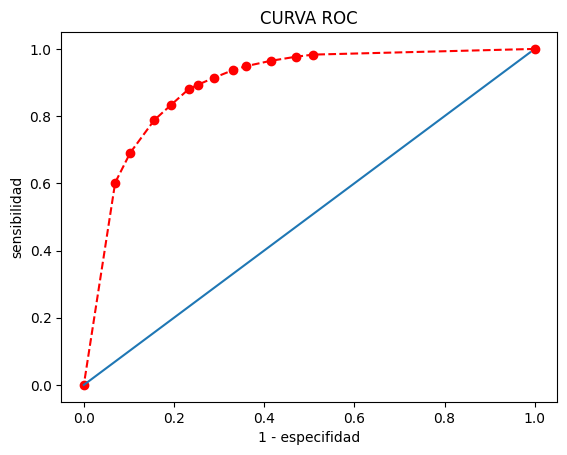

In [681]:
plt.plot(especifities, sensibilities, marker = "o", linestyle="--", color="red")
x= [i*0.01 for i in range(100)]
y= [i*0.01 for i in range(100)]
plt.plot(x,y)
plt.xlabel("1 - especifidad")
plt.ylabel("sensibilidad")
plt.title("CURVA ROC")

Instead of doing the graph above by hand, there is the library GGPLOT which allows to build it with less steps. 

In [682]:
espc_1, sensit, _ = metrics.roc_curve(y_test, prob2.iloc[:, 1])

In [683]:
df = pd.DataFrame({'x': espc_1, 'y': sensit})

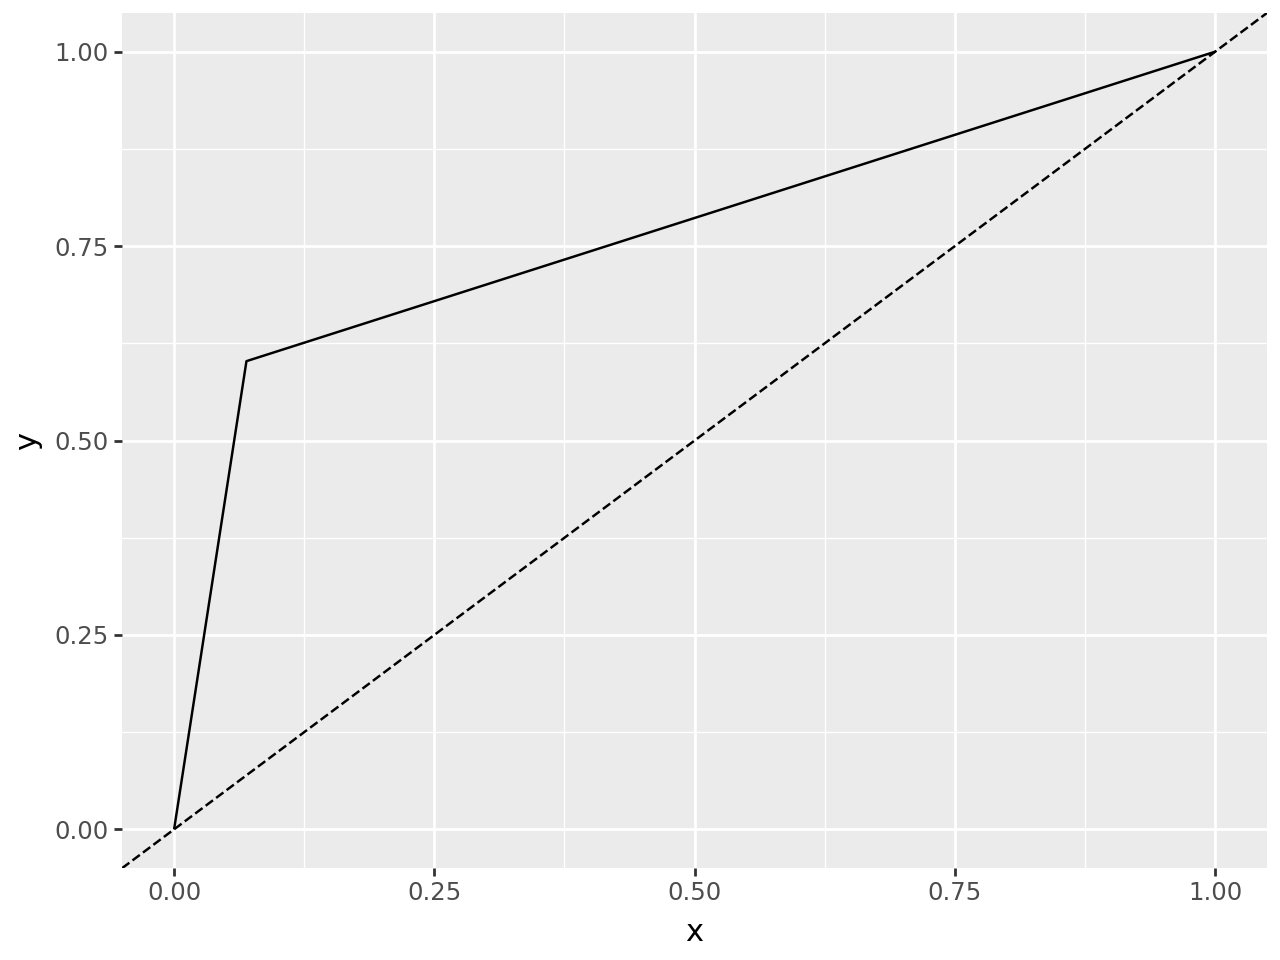

In [684]:
ggplot(df, aes(x= "x", y="y")) + geom_line() + geom_abline(linetype = "dashed")

For some reason that I do not understand, the graph ended up looking quite different, certainly less curvy. 

In [687]:
auc2 = metrics.auc (espc_1, sensit)
auc2

0.766260730068873

In [688]:
# The area under the curve is 0,766

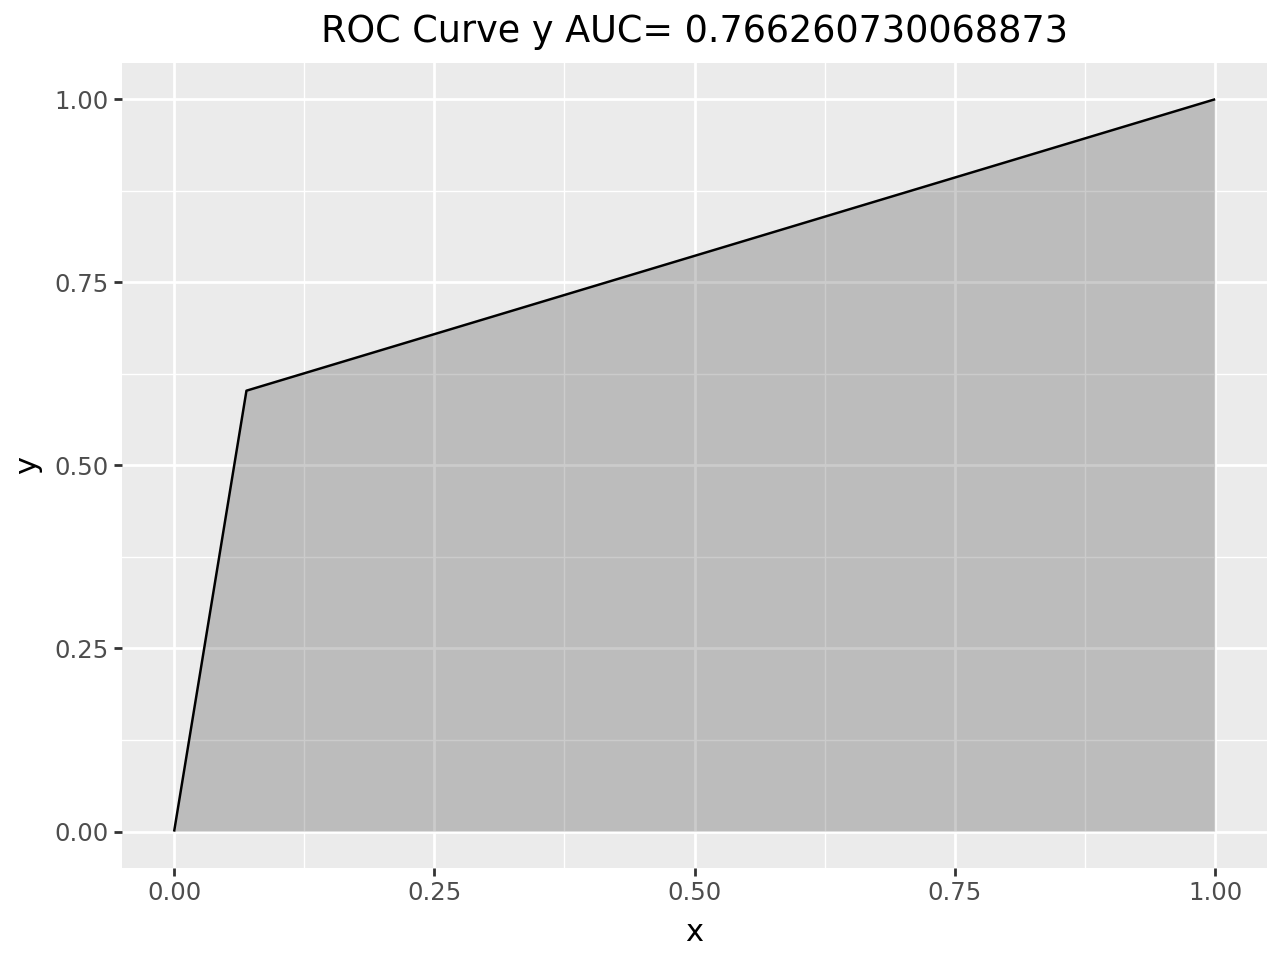

In [689]:
plot = (
    ggplot(df, aes(x="x", y="y")) +
    geom_area(alpha=0.25) +
    geom_line(aes(y="y")) +
    ggtitle("ROC Curve y AUC= %s" % str(auc2))
)

plot.show()


In [690]:
new_row = pd.DataFrame([{'Model': 'Logistic Regression with all the variables and GridSearch', 'Score': score2,'AUC': auc2 }])
results_df = pd.concat([results_df, new_row], ignore_index=True)
results_df.head()

,Model,Score,AUC
0,Logistic Regression with Top 20 Variables,0.847958,Not calculated
1,Logistic Regression with all the variables and...,0.849440,0.766261


## 6 - Logistic Regression with PCA

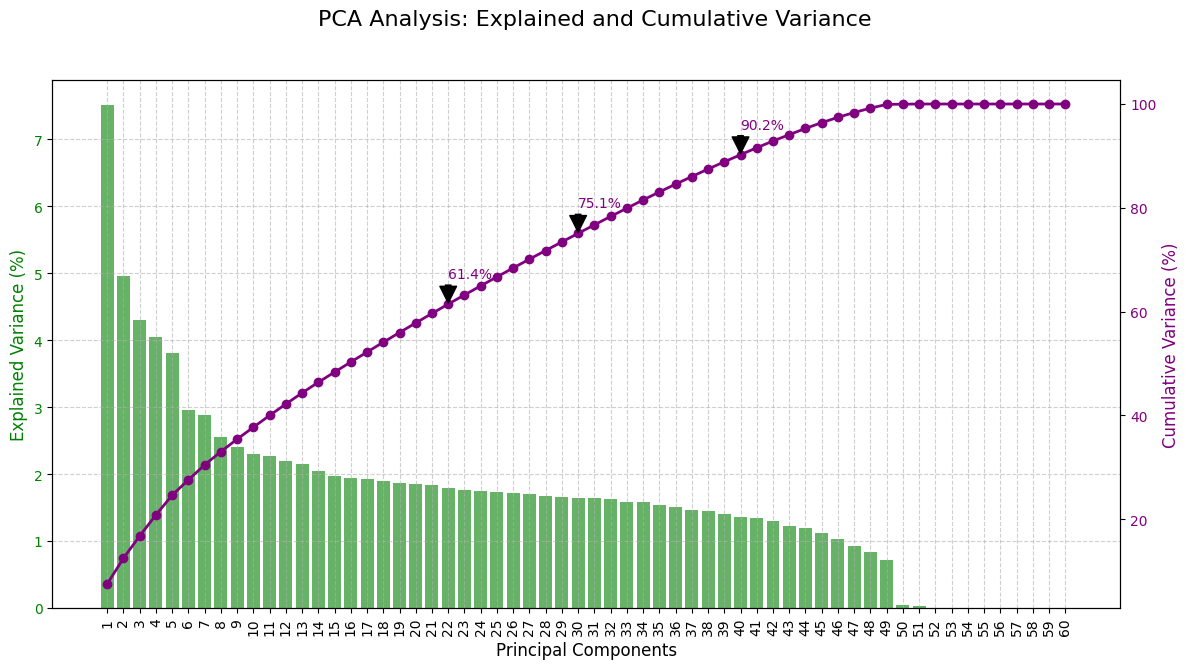

In [691]:
from sklearn.decomposition import PCA

# Define the number of components
n_comps = 60
components = range(1, n_comps + 1)

# Create PCA instance
pca = PCA(n_components=n_comps)

# Fit the PCA model
pca.fit(x_train)

# Transform the data
xpca = pca.transform(x_train)

# Percentage of variance explained by each principal component
eigenvalues = pca.explained_variance_ratio_

# Cumulative sum of explained variance
eigenvalues_acum = eigenvalues.cumsum()

# Plotting
fig, ax1 = plt.subplots(figsize=(12, 7))

# title
fig.suptitle('PCA Analysis: Explained and Cumulative Variance', fontsize=16)

# Left axis
ax1.set_xlabel('Principal Components', fontsize=12)
ax1.set_ylabel('Explained Variance (%)', color='green', fontsize=12)
ax1.bar(components, eigenvalues * 100, color='green', alpha=0.6)
ax1.tick_params(axis='y', labelcolor='green')
ax1.set_xticks(range(1, n_comps + 1))
ax1.set_xticklabels(range(1, n_comps + 1), rotation=90)  # Rotate x-axis labels
ax1.grid(True, linestyle='--', alpha=0.6)

# Right axis
ax2 = ax1.twinx()
ax2.set_ylabel('Cumulative Variance (%)', color='purple', fontsize=12)
ax2.plot(components, eigenvalues_acum * 100, color='purple', marker='o', linestyle='-', linewidth=2)
ax2.tick_params(axis='y', labelcolor='purple')

# Annotate cumulative variance at key points (e.g., 60%, 75%, 90%)
for i, value in enumerate(eigenvalues_acum * 100):
    if value >= 60 and (i == 0 or eigenvalues_acum[i-1] * 100 < 60):
        ax2.annotate(f'{value:.1f}%', 
                     xy=(components[i], value), 
                     xytext=(components[i], value + 5),
                     textcoords='data',
                     arrowprops=dict(facecolor='black', shrink=0.05),
                     fontsize=10, color='purple')
    if value >= 75 and (i == 0 or eigenvalues_acum[i-1] * 100 < 75):
        ax2.annotate(f'{value:.1f}%', 
                     xy=(components[i], value), 
                     xytext=(components[i], value + 5),
                     textcoords='data',
                     arrowprops=dict(facecolor='black', shrink=0.05),
                     fontsize=10, color='purple')
    if value >= 90 and (i == 0 or eigenvalues_acum[i-1] * 100 < 90):
        ax2.annotate(f'{value:.1f}%', 
                     xy=(components[i], value), 
                     xytext=(components[i], value + 5),
                     textcoords='data',
                     arrowprops=dict(facecolor='black', shrink=0.05),
                     fontsize=10, color='purple')

# Improve layout and show plot
fig.tight_layout(rect=[0, 0.03, 1, 0.95])  # Adjust layout to include title
plt.show()

In [692]:
# with 49 PCA we get to explain almost all the variance
n_comps = 49

from sklearn.decomposition import PCA
pca = PCA(n_components=n_comps)
pca.fit(x_train)

# Transform the data into the top 5 PCs
xtrain_pca = pca.transform(x_train)
xtest_pca = pca.transform(x_test)

In [571]:
# parameter grid
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'penalty': ['l2'],  
    'solver': ['lbfgs', 'newton-cg', 'saga']  
}


log_reg = LogisticRegression(max_iter = 10000)
grid_search = GridSearchCV(estimator=log_reg, 
                           param_grid=param_grid, 
                           scoring='accuracy', 
                           cv=5, 
                           n_jobs=-1, 
                           verbose=1)
grid_search.fit(xtrain_pca, y_train)


best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

Fitting 5 folds for each of 18 candidates, totalling 90 fits


In [572]:
best_params

{'C': 0.1, 'penalty': 'l2', 'solver': 'saga'}

In [693]:
lm3 = LogisticRegression(penalty='l2', C=0.1, solver='saga', max_iter=10000)

In [694]:
lm3.fit(xtrain_pca,y_train)

LogisticRegression(C=0.1, max_iter=10000, solver='saga')

In [695]:
probs3 = lm3.predict_proba(xtest_pca)

In [696]:
probs3

array([[0.28453268, 0.71546732],
       [0.8102312 , 0.1897688 ],
       [0.90598973, 0.09401027],
       ...,
       [0.66405555, 0.33594445],
       [0.96203371, 0.03796629],
       [0.97787521, 0.02212479]])

In [697]:
prediction3= lm3.predict(xtest_pca)

In [698]:
prediction3

array([1, 0, 0, ..., 0, 0, 0], dtype=int64)

In [699]:
prob3 = probs3[:,1]
prob3 = pd.DataFrame(prob3)
threshold = 0.4
prob3["Probabilidad"] = np.where(prob3[0]>threshold, 1, 0 )
prob3

,0,Probabilidad
0,0.715467,1
1,0.189769,0
2,0.094010,0
3,0.999919,1
4,0.013957,0
...,...,...
9757,0.472656,1
9758,0.095238,0
9759,0.335944,0
9760,0.037966,0


In [700]:
pd.crosstab(prob3.Probabilidad, columns="count")

col_0,count
Probabilidad,
0,7365
1,2397


In [701]:
2397/len(prob3)

0.2455439459127228

In [702]:
metrics.accuracy_score(y_test,prediction3)

0.851259987707437

In [703]:
scores3 = cross_val_score(LogisticRegression(penalty='l2', C=10, solver='lbfgs', max_iter=10000),xtrain_pca,y_train ,scoring="accuracy", cv = 50)

In [704]:
scores3

array([0.88157895, 0.83114035, 0.86184211, 0.86842105, 0.85526316,
       0.8377193 , 0.84210526, 0.83991228, 0.82675439, 0.83114035,
       0.88815789, 0.85307018, 0.85526316, 0.83552632, 0.86403509,
       0.84429825, 0.8377193 , 0.87061404, 0.86403509, 0.82894737,
       0.82894737, 0.87061404, 0.83991228, 0.84429825, 0.85526316,
       0.85934066, 0.84835165, 0.83736264, 0.85054945, 0.83296703,
       0.83516484, 0.83076923, 0.84175824, 0.84175824, 0.86373626,
       0.84395604, 0.86153846, 0.83076923, 0.87252747, 0.86593407,
       0.83956044, 0.84175824, 0.86813187, 0.86153846, 0.84175824,
       0.85274725, 0.85934066, 0.84395604, 0.85274725, 0.87032967])

In [705]:
score3 = scores3.mean()
score3

0.8500986119144013

In [706]:
# Use .iloc[:, 1] to get the second column from the DataFrame
espc_1, sensit, _ = metrics.roc_curve(y_test, prob3.iloc[:, 1])

In [707]:
df = pd.DataFrame({'x': espc_1, 'y': sensit})

In [708]:
auc3 = metrics.auc (espc_1, sensit)
auc3

0.794410295038867

In [709]:
# The area under the curve is 0,794

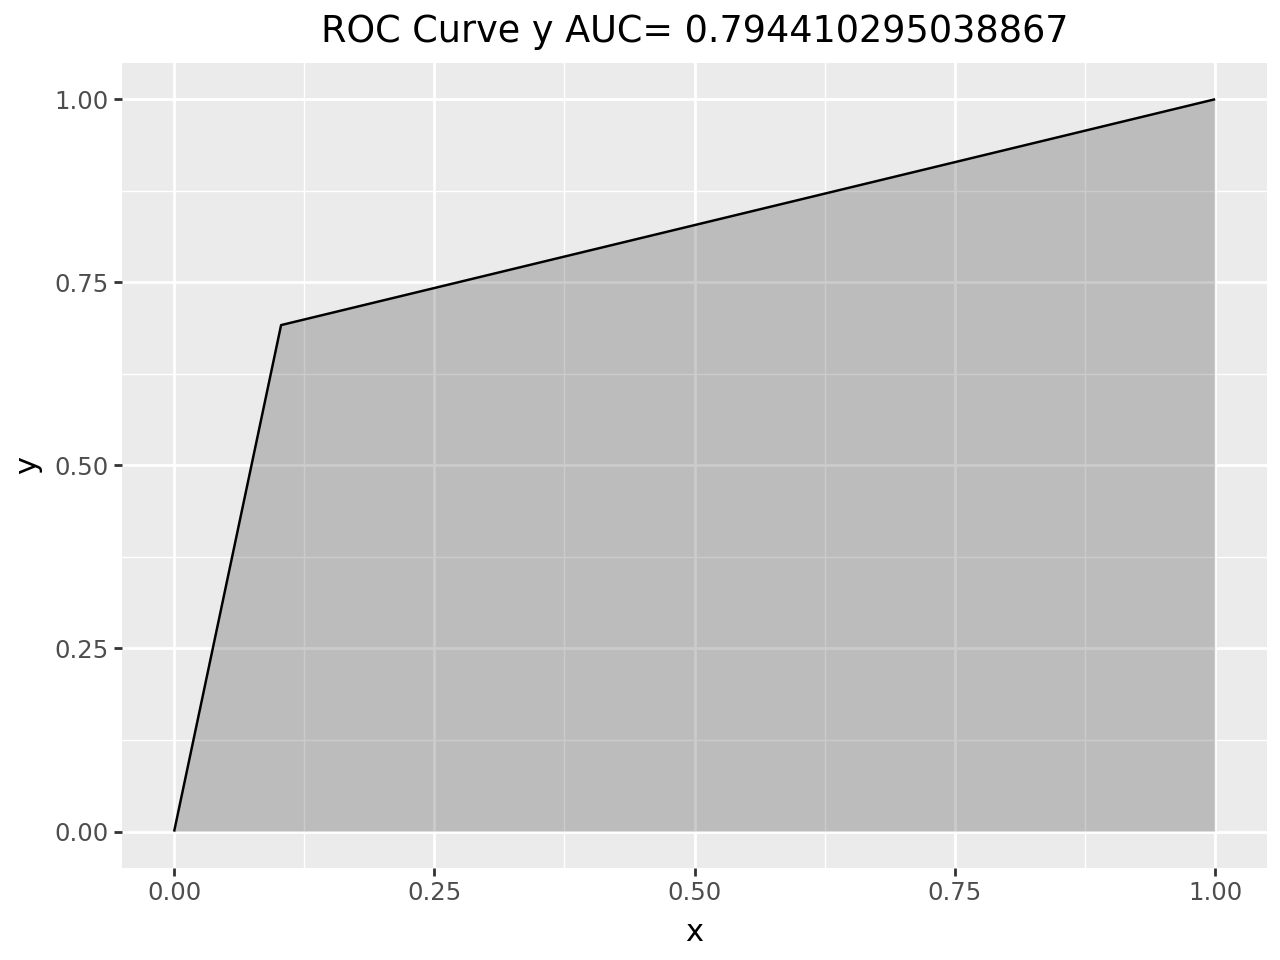

In [710]:
plot = (
    ggplot(df, aes(x="x", y="y")) +
    geom_area(alpha=0.25) +
    geom_line(aes(y="y")) +
    ggtitle("ROC Curve y AUC= %s" % str(auc3))
)

plot.show()

In [711]:
new_row = pd.DataFrame([{'Model': 'Logistic Regression with PCA', 'Score': score3,'AUC': auc3 }])
results_df = pd.concat([results_df, new_row], ignore_index=True)
results_df.head()

,Model,Score,AUC
0,Logistic Regression with Top 20 Variables,0.847958,Not calculated
1,Logistic Regression with all the variables and...,0.849440,0.766261
2,Logistic Regression with PCA,0.850099,0.79441


## 6 - Best Model Selection

The selected model is Model 2 **"Logistic Regression with PCA"**. It demonstrates robust performance with an accuracy score of **0.85** and an AUC of **0.794**. The high accuracy indicates that the model correctly predicts the outcome in 85% of the cases, showing that it fits the data really well, meaning it’s doing a good job at making predictions based on the dataset we have. The AUC of 0.794, while slightly below the ideal value of 1, reflects a good level of discrimination between the positive and negative classes. This means the model does a good job of telling the difference between the two outcomes, but there’s still some potential to make it even better. Overall, the logistic regression model performs well and provides valuable insights, but continued evaluation and potential enhancements could further improve its predictive power.